Install fastai and duckduckgo_search libraries...

In [22]:
!pip install -Uqq fastai duckduckgo_search

In [23]:
import duckduckgo_search
print(dir(duckduckgo_search))

['AsyncDDGS', 'DDGS', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', 'duckduckgo_search', 'duckduckgo_search_async', 'exceptions', 'logging', 'models', 'utils', 'version']


In [24]:
!pip install fastbook


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python3.11 -m pip install --upgrade pip


Use fastbook for it's search_images_ddg method.
Define search_images which takes arbitrary query and returns list of urls.


In [25]:
from fastbook import *

def search_images(term, max=30):
  print(f"Searching for '{term}'")
  return search_images_ddg(term, max_images=max)

urls = search_images_ddg('bird photos', max_images=1)
urls[0]

'https://wallpapercave.com/wp/wp7039045.jpg'

Use 'download_url' function from 'fastdownload' module to save the image locally. Open and view it..

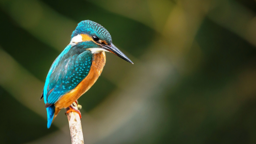

In [26]:
from fastdownload import download_url
dest = 'bird.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

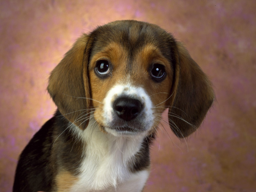

In [27]:
download_url(search_images_ddg('dog photos', max_images=1)[0], 'dog.jpg', show_progress=False)
Image.open('dog.jpg').to_thumb(256,256)

In [28]:
# Define a tuple of search terms. These will be used to search for images
searches = 'dog', 'bird'
# Use Path function to define location
path = Path('bird_or_not')
# Give api extra time
from time import sleep
# Iterate over the searches tuple
for o in searches:
  # Create unique folder for each search term in the tuple
  dest = (path/o) # bird_or_not/{'dog', 'bird'}
  # Use mkdir to create the directory. exist_ok=True means it won't throw an error if the directory already exists. Parents=True means it will create the parent directory if it doesn't exist
  dest.mkdir(exist_ok=True, parents=True)

  download_images(dest, urls=search_images(f'{o} photo'))
  sleep(10)
  download_images(dest, urls=search_images(f'{o} sun photo'))
  sleep(10)
  download_images(dest, urls=search_images(f'{o} shade photo'))
  sleep(10)
  resize_images(path/o, max_size=400, dest=path/o)

Searching for 'dog photo'
Searching for 'dog sun photo'
Searching for 'dog shade photo'
Searching for 'bird photo'
Searching for 'bird sun photo'
Searching for 'bird shade photo'


In [29]:
# Check data set for failed downloads
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

6

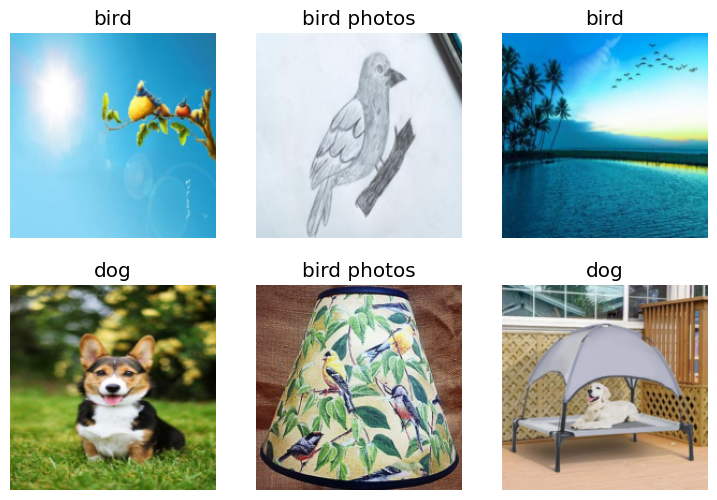

In [30]:
# Use `DataLoaders` to train the model. It's an object that contains
# a training set (images used to create model) and a validation set(
# images used to check accurcacy of model). The `DataBlock` function gives
# us this functionalitly.
dls = DataBlock(
  blocks=(ImageBlock, CategoryBlock), # inputs to model are images, outputs are categories
  get_items=get_image_files, # grab all images in the path
  splitter=RandomSplitter(valid_pct=0.2, seed=42), # split data into
  # training and validation sets randomly, using 20% for validation
  get_y=parent_label, # label is name of parent dir
  item_tfms=[Resize(192, method='squish')] # resize each
).dataloaders(path, bs=32) # bs==batch size

dls.show_batch(max_n=6)

In [31]:
# train using computer vision model resnet18. Use fastai's fine_tune
# which auto sets best practices for fine tuning a pre trained model
# 'fine-tuning' means starting with a model soemone else trained with
# another dataset and adjusting the params so it works with your dataset

learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,1.906563,1.569970,0.531915,00:02


epoch,train_loss,valid_loss,error_rate,time
0,1.195720,2.022968,0.606383,00:03
1,1.110270,2.487636,0.638298,00:02
2,1.021070,2.499106,0.648936,00:02


This is a: bird photos.
Probability it's a bird: 0.3578


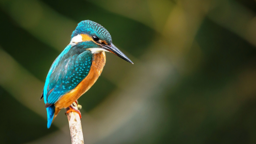

In [37]:

# Use the fine-tuned resnet18 to predict bird
is_bird,_,probs = learn.predict(PILImage.create('bird.jpg'))
# show 'bird.jpg'
print(f"This is a: {is_bird}.")
print(f"Probability it's a bird: {probs[0]:.4f}")
Image.open('bird.jpg').to_thumb(256,256)


In [33]:
!pwd

/Users/gm/projects/ml/fastai
